# Dijkstra's algorithm
Dijkstra's algorithm is for finding the single source shortest path from a starting node to all the other nodes in a connected graph of non-negative weights.

This algorithm operates on the principle of relaxation, where it initially overestimates the distances from each node to the source node, setting these distances as an upper bound.

The distance is calculated as the sum of all the edges from the source node to the particular node.

As a new edge is visited, new paths are found as outgoing edges to other nodes. The distance to these outgoing nodes is updated as the minimum of the old path length and the new path length, thus lowering the upper bound as the estimate of the shortest distance.

The visited node will be added to our set of visited node and the distance distance of the visited node is the distance of the shortest path from the source node.

Dijkstra separates the nodes into visited nodes and unvisited nodes. The frontier nodes are a set of unvisited nodes that act as the barrier between the visited nodes and the other unvisited node. We keep track of the frontier node with the minimum distance and add that node to our set of visited nodes. The distance of the visited node is the shortest distance from the source node because any path from the visited nodes to the unvisited nodes must pass through the frontier nodes and the node that we added to the visited node has the smallest distance.

Frontier Node: An unvisited node that is an edge away from a visited node.

## Algorithm
We will use a set to keep track of the visited node. Once a node has been visited we will put the node in the set.

Visited node

|Set<Node>|
|--|
|node1, node2, ...|

A map is used to store distances from the source, initially set to infinity for all nodes.


|Key: node| Val: int|
|---|---|
|node1|$\infty$|
|node2|$\infty$|
|node3|$\infty$|
|node4|$\infty$|


Step 1: 
Initialize the distance of the starting node to 0 and all the other nodes to infinity.

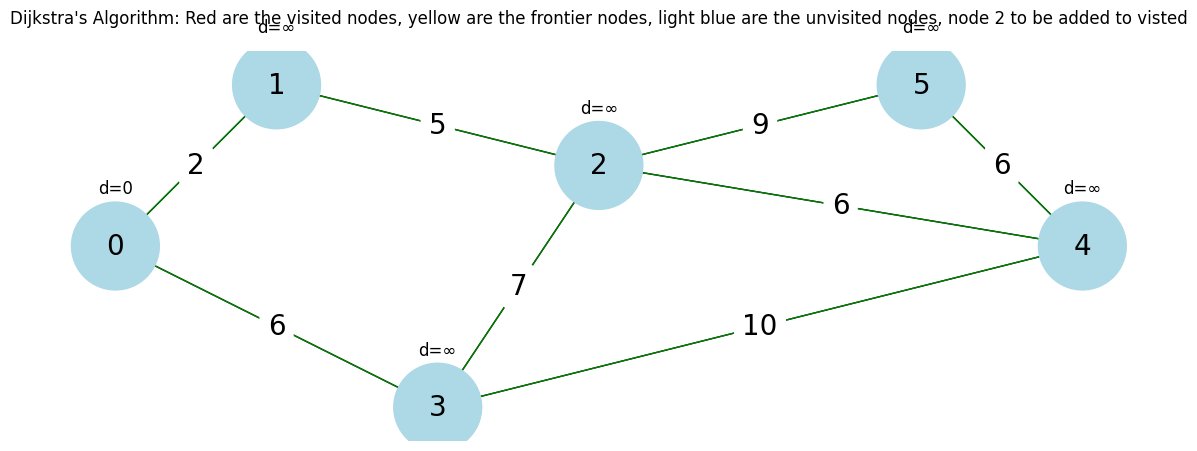

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='lightblue')
Dijkstra.add_node(1, color='lightblue')
Dijkstra.add_node(2, color='lightblue')
Dijkstra.add_node(3, color='lightblue')
Dijkstra.add_node(4, color='lightblue')
Dijkstra.add_node(5, color='lightblue')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "\u221E",  
    2: "\u221E", 
    3: "\u221E", 
    4: "\u221E", 
    5: '\u221E'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
ax1.set_title("Dijkstra's Algorithm: Red are the visited nodes, yellow are the frontier nodes, light blue are the unvisited nodes, node 2 to be added to visted", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Step 2: 
Visit the source node. For all the adjacent nodes that is at the end of the outgoing edges of the source node that hasn't been visited: 
- Calculated the distance of `the visited node + the outgoing edge`
- Update the distance of the adjacent node if the distance of `the visited node + the outgoing edge` is less than the current distance of the adjacent node. 

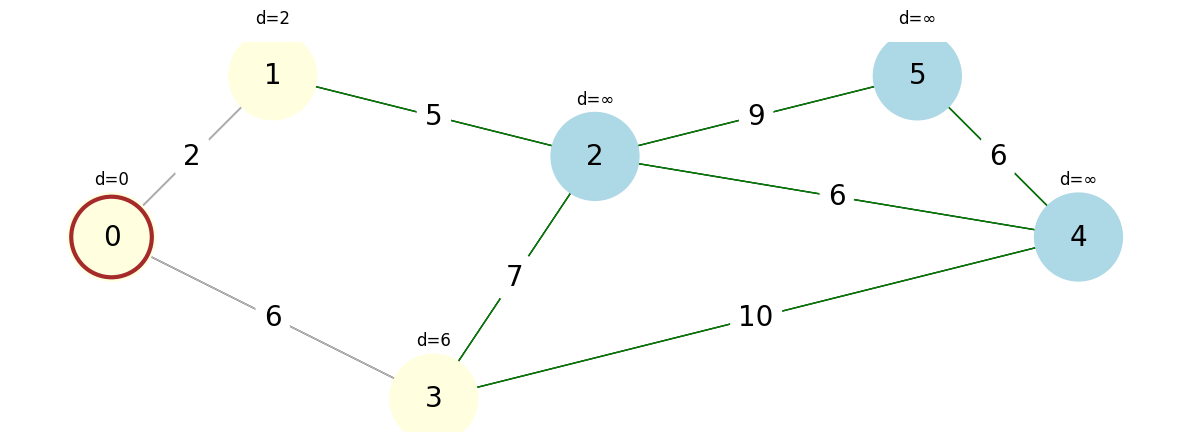

In [102]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='lightyellow')
Dijkstra.add_node(1, color='lightyellow')
Dijkstra.add_node(2, color='lightblue')
Dijkstra.add_node(3, color='lightyellow')
Dijkstra.add_node(4, color='lightblue')
Dijkstra.add_node(5, color='lightblue')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "\u221E", 
    3: "6", 
    4: "\u221E", 
    5: '\u221E'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['silver' if (u, v) in [(0, 1), (0, 3)] or (v, u) in [(0, 1), (0, 3)] else 'green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Add a brown circle around node 2
circle_radius = 0.25
circle = patches.Circle(pos[0], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()


Then mark the visted node as visited.

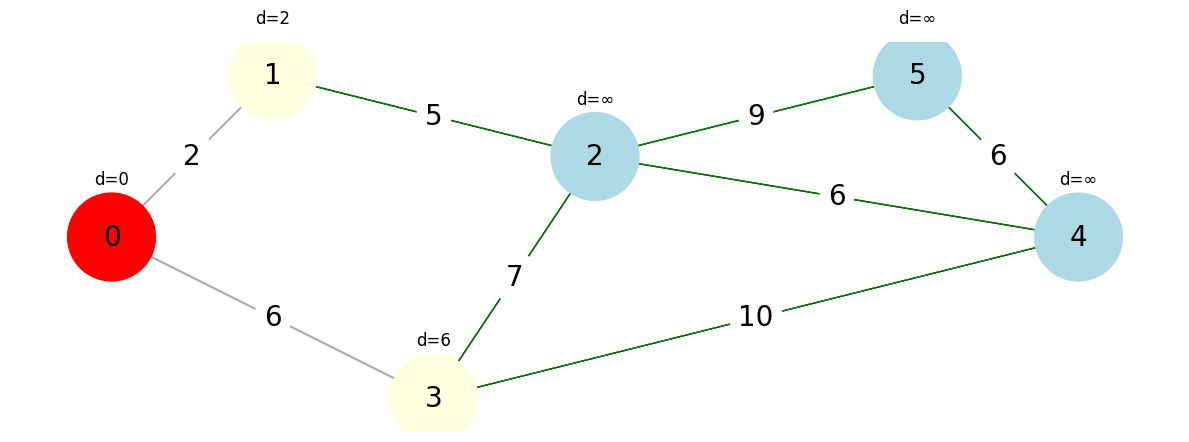

In [92]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='lightyellow')
Dijkstra.add_node(2, color='lightblue')
Dijkstra.add_node(3, color='lightyellow')
Dijkstra.add_node(4, color='lightblue')
Dijkstra.add_node(5, color='lightblue')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "\u221E", 
    3: "6", 
    4: "\u221E", 
    5: '\u221E'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['silver' if (u, v) in [(0, 1), (0, 3)] or (v, u) in [(0, 1), (0, 3)] else 'green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Step 3:
Select the unvisited node with the smallest distance and repeat Step 2 with that node.
Continues untill all the nodes has been visited.

Note: As each node is visited, the set of unvisited nodes shrinks, breaking the problem into smaller subproblems.

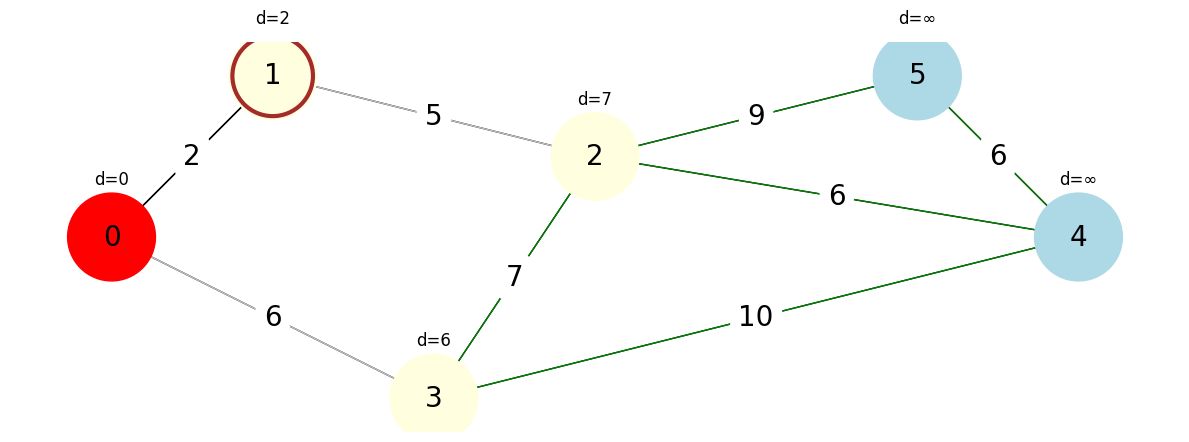

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='lightyellow')
Dijkstra.add_node(2, color='lightyellow')
Dijkstra.add_node(3, color='lightyellow')
Dijkstra.add_node(4, color='lightblue')
Dijkstra.add_node(5, color='lightblue')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "7", 
    3: "6", 
    4: "\u221E", 
    5: '\u221E'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['black' if (u, v) in [(0, 1)] or (v, u) in [(0, 1)]
               else 'silver' if (u, v) in [(0, 3), (1, 2)] or (v, u) in [(0, 3), (1, 2)]
               else 'green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Add a brown circle around node 2
circle_radius = 0.25
circle = patches.Circle(pos[1], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()


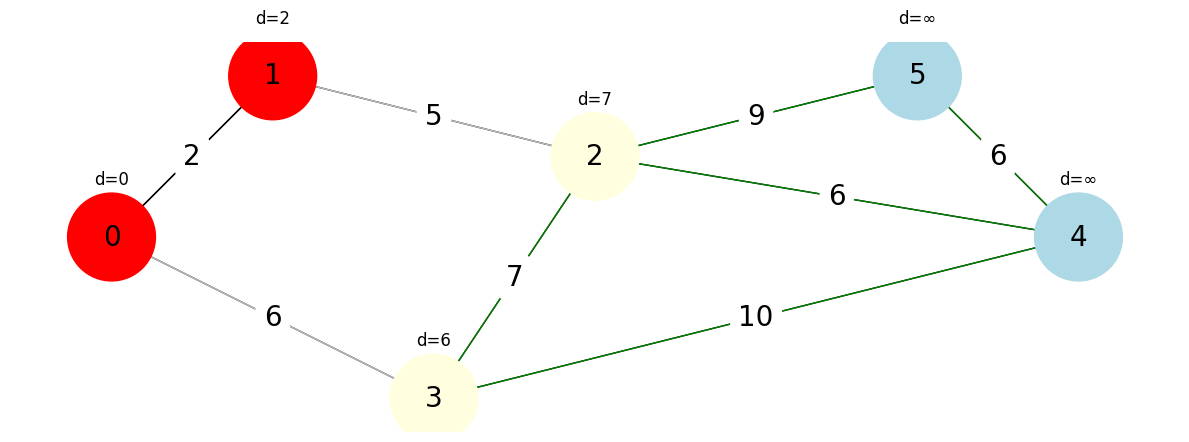

In [100]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='red')
Dijkstra.add_node(2, color='lightyellow')
Dijkstra.add_node(3, color='lightyellow')
Dijkstra.add_node(4, color='lightblue')
Dijkstra.add_node(5, color='lightblue')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "7", 
    3: "6", 
    4: "\u221E", 
    5: '\u221E'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['black' if (u, v) in [(0, 1)] or (v, u) in [(0, 1)]
               else 'silver' if (u, v) in [(0, 3), (1, 2)] or (v, u) in [(0, 3), (1, 2)]
               else 'green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

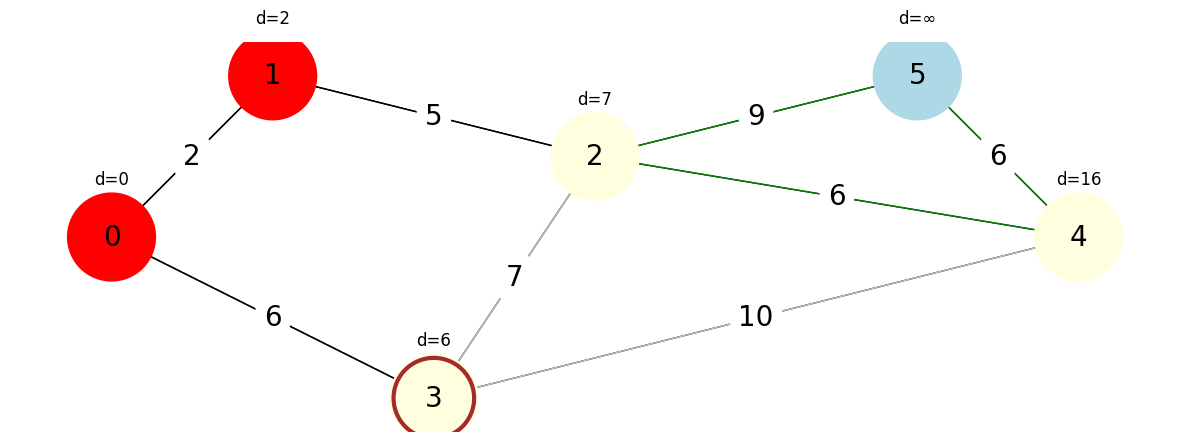

In [95]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='red')
Dijkstra.add_node(2, color='lightyellow')
Dijkstra.add_node(3, color='lightyellow')
Dijkstra.add_node(4, color='lightyellow')
Dijkstra.add_node(5, color='lightblue')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "7", 
    3: "6", 
    4: "16", 
    5: '\u221E'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['black' if (u, v) in [(0, 1), (1, 2), (0, 3)] or (v, u) in [(0, 1), (1, 2), (0, 3)]
               else 'silver' if (u, v) in [(3, 2), (3, 4)] or (v, u) in [(3, 2), (3, 4)]
               else 'green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Add a brown circle around node 2
circle_radius = 0.25
circle = patches.Circle(pos[3], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Note: By marking nodes as visited and excluding them from future checks, the algorithm avoids unnecessary backtracking.

## Triangle Inequality
The effectiveness of Dijkstra's algorithm is based on the triangle inequality, which ensures that the path found is the shortest.

For example, if the direct path from node 0 to node 3 is 6 units (d=6(0->3)) is the shourtest then any alternative route must go through the other frontier nodes eg (d=7(0->1->2)), and since node 3 is the shortest route to any frontier node then:
- d=6(0->3) < d=7(0->1->2)
- d=6(0->3) <= d=7(0->1->2) + d=14(0->1->2->3)
- d=6(0->3) <= d=M (path to any frontier node) + d=N (distance to any unvisited node)

This illustrates that the shortest path does not involve detours through additional nodes, validating the distances updated and maintained throughout the algorithm's execution.

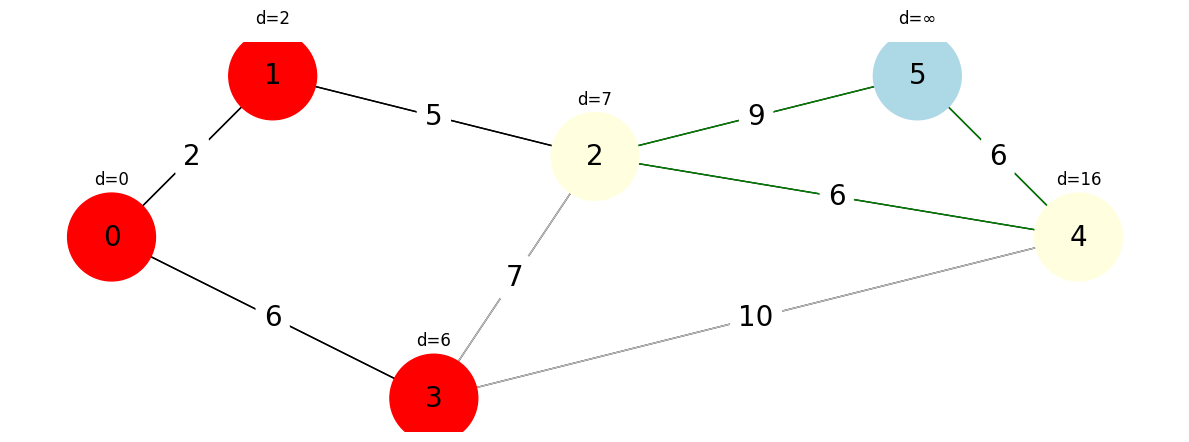

In [98]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='red')
Dijkstra.add_node(2, color='lightyellow')
Dijkstra.add_node(3, color='red')
Dijkstra.add_node(4, color='lightyellow')
Dijkstra.add_node(5, color='lightblue')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "7", 
    3: "6", 
    4: "16", 
    5: '\u221E'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['black' if (u, v) in [(0, 1), (1, 2), (0, 3)] or (v, u) in [(0, 1), (1, 2), (0, 3)]
               else 'silver' if (u, v) in [(3, 2), (3, 4)] or (v, u) in [(3, 2), (3, 4)]
               else 'green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

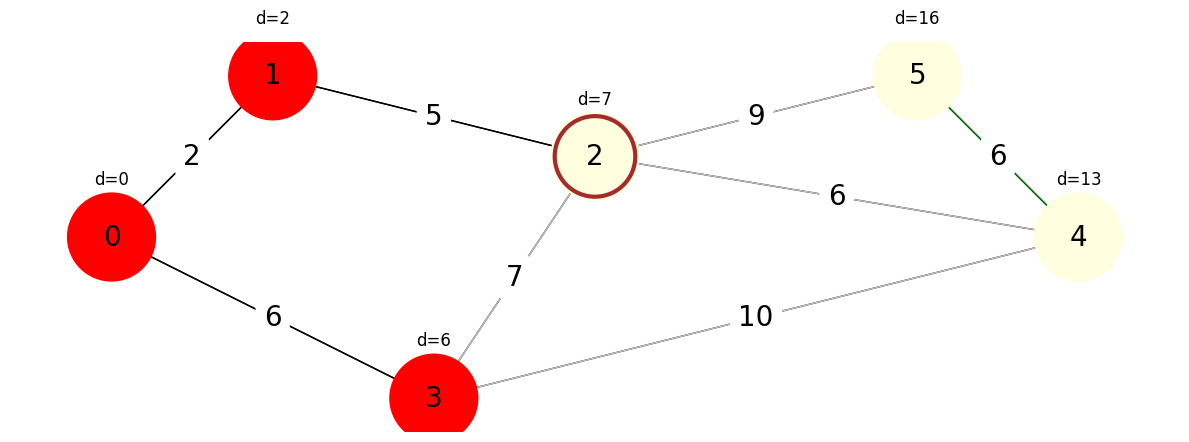

In [97]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='red')
Dijkstra.add_node(2, color='lightyellow')
Dijkstra.add_node(3, color='red')
Dijkstra.add_node(4, color='lightyellow')
Dijkstra.add_node(5, color='lightyellow')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "7", 
    3: "6", 
    4: "13", 
    5: '16'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['black' if (u, v) in [(0, 1), (1, 2), (0,3)] or (v, u) in [(0, 1), (1, 2), (0,3)]
               else 'silver' if (u, v) in [(3, 2), (3, 4), (2,4), (2,5)] or (v, u) in [(3, 2), (3, 4), (2,4), (2,5)]
               else 'green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Add a brown circle around node 2
circle_radius = 0.25
circle = patches.Circle(pos[2], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()


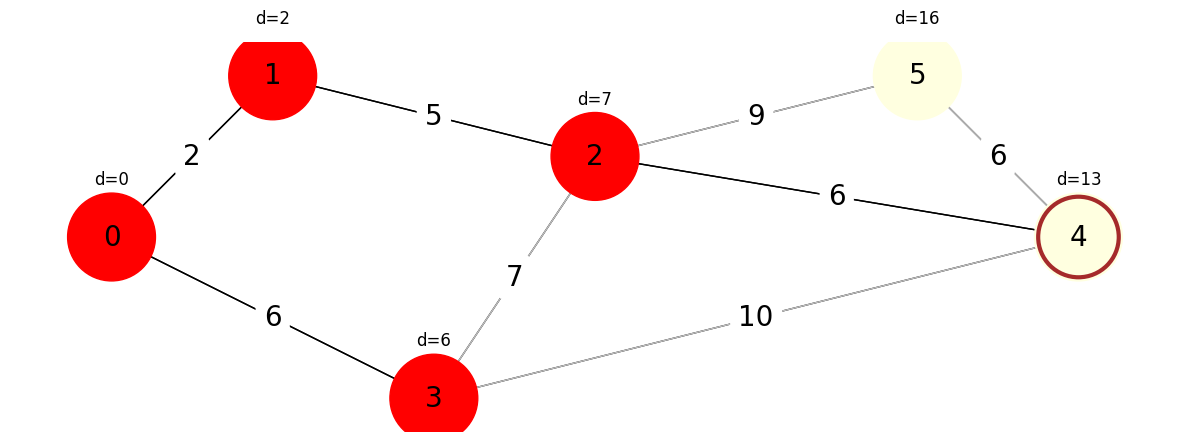

In [82]:
# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='red')
Dijkstra.add_node(2, color='red')
Dijkstra.add_node(3, color='red')
Dijkstra.add_node(4, color='lightyellow')
Dijkstra.add_node(5, color='lightyellow')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "7", 
    3: "6", 
    4: "13", 
    5: '16'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['black' if (u, v) in [(0, 1), (1, 2), (2,4), (0,3)] or (v, u) in [(0, 1), (1, 2), (2,4), (0,3)]
               else 'silver' if (u, v) in [(3,2),(3,4),(2,5),(4,5)] or (v, u) in [(3,2),(3,4),(2,5),(4,5)]
               else 'green' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Add a brown circle around node 2
circle_radius = 0.25
circle = patches.Circle(pos[4], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()


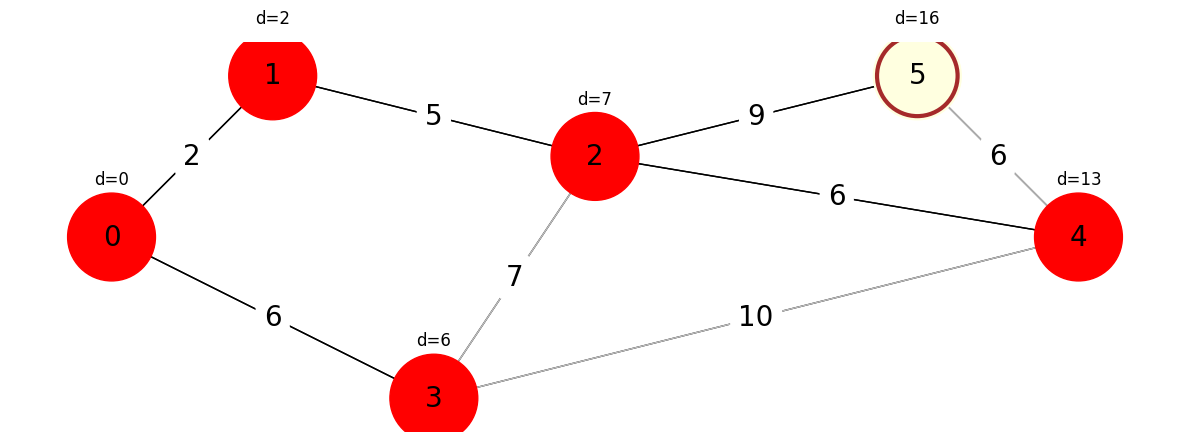

In [90]:
# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='red')
Dijkstra.add_node(2, color='red')
Dijkstra.add_node(3, color='red')
Dijkstra.add_node(4, color='red')
Dijkstra.add_node(5, color='lightyellow')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "7", 
    3: "6", 
    4: "13", 
    5: '16'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['black' if (u, v) in [(0, 1), (1, 2), (2,5), (0,3), (2,4)] or (v, u) in [(0, 1), (1, 2), (2,5), (0,3), (2,4)]
               else 'silver' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Add a brown circle around node 2
circle_radius = 0.25
circle = patches.Circle(pos[5], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

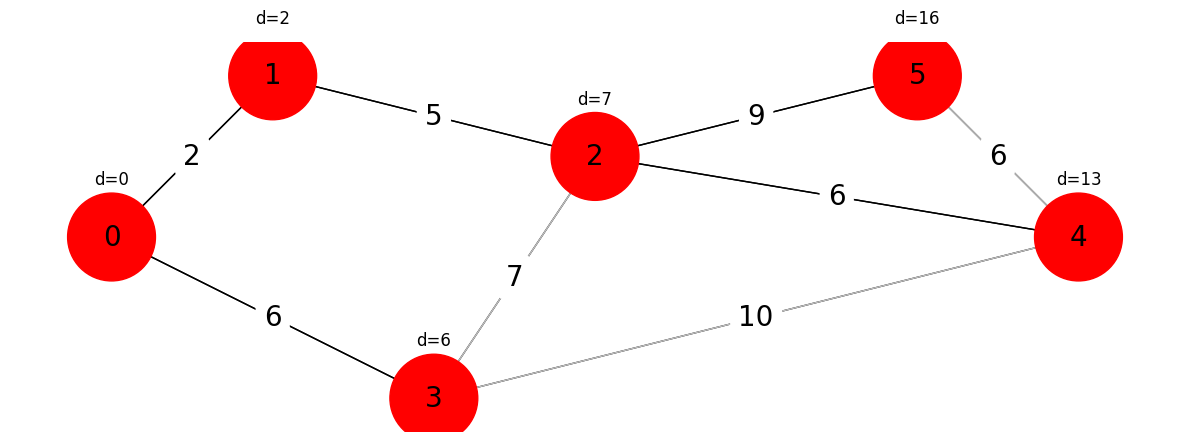

In [91]:
# Create the graph
Dijkstra = nx.Graph()

# Add nodes with color attributes
Dijkstra.add_node(0, color='red')
Dijkstra.add_node(1, color='red')
Dijkstra.add_node(2, color='red')
Dijkstra.add_node(3, color='red')
Dijkstra.add_node(4, color='red')
Dijkstra.add_node(5, color='red')

# Add edges with labels
Dijkstra.add_edge(0, 1, label='2')
Dijkstra.add_edge(0, 3, label='6')
Dijkstra.add_edge(1, 2, label='5')
Dijkstra.add_edge(3, 2, label='7')
Dijkstra.add_edge(2, 5, label='9')
Dijkstra.add_edge(2, 4, label='6')
Dijkstra.add_edge(3, 4, label='10')
Dijkstra.add_edge(5, 4, label='6')

# Define the layout of the graph
pos = {
    0: (-2, 1),   # Node 0
    1: (-1, 2),   # Node 1
    2: (1, 1.5),  # Node 2
    3: (0, 0),    # Node 3
    4: (4, 1),    # Node 4
    5: (3, 2)     # Node 5
}

distance = {
    0: "0",
    1: "2",  
    2: "7", 
    3: "6", 
    4: "13", 
    5: '16'
}

node_colors = [Dijkstra.nodes[node]['color'] for node in Dijkstra.nodes()]

# Draw edges with colors
edge_colors = ['black' if (u, v) in [(0, 1), (1, 2), (2,5), (0,3), (2,4)] or (v, u) in [(0, 1), (1, 2), (2,5), (0,3), (2,4)]
               else 'silver' for u, v in Dijkstra.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Dijkstra, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Dijkstra, 'label')
nx.draw_networkx_edges(Dijkstra, pos, edgelist=Dijkstra.edges(), edge_color=edge_colors, ax=ax1)
nx.draw_networkx_edge_labels(Dijkstra, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')
    ax1.text(x, y + 0.3, f'd={distance[node]}', fontsize=12, ha='center', va='bottom')

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

In [55]:
from typing import Union, List, Tuple, Dict
from collections import defaultdict
import heapq

Node = Union[int, str]

class Dijkstra:
    def __init__(self, edges: List[Tuple[Node, Node, int]]) -> None:
        self.adjacent_map = self.__initialize_adjacent_map(edges)
        self.distances = self.__initialize_distances(self.adjacent_map)

    def __initialize_adjacent_map(self, edges: List[Tuple[Node, Node, int]]) -> Dict[Node, List[Tuple[Node, int]]]:
        adjacent_map = defaultdict(list)
        for node1, node2, weight in edges:
            adjacent_map[node1].append((weight, node2))
            adjacent_map[node2].append((weight, node1))  # Assuming the graph is undirected
        return dict(adjacent_map)

    def __initialize_distances(self, adjacent_map: Dict[Node, List[Tuple[Node, int]]]) -> Dict[Node, int]:
        distances = {}
        for node in adjacent_map.keys():
            distances[node] = float('inf')
        return distances

    def find_shortest_path(self, start_node: Node) -> Dict[Node, int]:
        # This method would implement Dijkstra's algorithm to find the shortest path
        # from start_node to all other nodes. This method should return a dictionary
        # mapping nodes to their shortest distance from start_node.
        distances = self.distances.copy()
        visited_nodes = set()
        min_heap = []
        
        distances[start_node] = 0
        heapq.heappush(min_heap, (0, start_node))

        while min_heap:
            current_node_distance, current_node = heapq.heappop(min_heap)
            if current_node not in visited_nodes:
                for adjacent_node_edge_length, adjacent_node in self.adjacent_map[current_node]:
                    distances[adjacent_node] = min(distances[adjacent_node], current_node_distance + adjacent_node_edge_length)
                    heapq.heappush(min_heap, (distances[adjacent_node], adjacent_node))
            visited_nodes.add(current_node)

        return distances

In [56]:
edges = [
    (0, 1, 2),
    (0, 3, 6),
    (1, 2, 5),
    (2, 3, 7),
    (2, 5, 9),
    (2, 4, 6),
    (3, 4, 10),
    (5, 4, 6)
]

dijkstra = Dijkstra(edges)

In [108]:
dijkstra.find_shortest_path(0)

{0: 0, 1: 2, 3: 6, 2: 7, 5: 16, 4: 13}

## Limitation of Dijkstra's Algorithm with Negative Weights
The algorithm relies fundamentally on the assumption that once the shortest path to a node is determined, it will not change. This is because each successive step in Dijkstra’s algorithm builds on the previous steps, assuming that the previously calculated shortest paths are correct and final.

The algorithm relies that distance of the visited node is the distance from the shortest path from the source node. This is supported by the triangle inequality in which the path of the selected node is the shortest. Any alternative route that tries to reach this node through another frontier node will inherently have a greater distance because it must include the additional path length from the other frontier node to the selected node.

The presence of negative weights disrupts this assumption. A negative weight is sufficiently small that a detour via another frontier node to the visited node could result in a shorter path than previously determined.

# Difference between Prims and Dijkstra
The Dijkstra and Prims algorithm look similar, because they both perform breadth first search and select the minimum distances of unvisited nodes. Lets look at the difference between them.

- Prims Algorithm: Used to find the minimum spanning tree (MST) in a weighted, undirected graph. It starts from any node and expands the tree by adding the nearest unvisited node at each step, ensuring all nodes are connected with the minimum possible total edge weight.
- Dijkstra Algorithm: Used to find the shortest path from a single source to all other nodes in a graph with non-negative weights. It calculates the shortest path by continuously updating the cumulative cost to reach each node from the source, selecting the node with the smallest known distance at each step.

Distance Calculation:
- Prims: The distance tracked for each node is the minimum edge weight by which it can be connected to the growing MST. It only considers the weight of the connecting edge from the MST to a new node.
- Dijkstra: The distance for each node is the sum of the weights from the source node along the shortest path found so far. It accumulates total path weights from the source to each node.

Prims algorithm gives the tree where all the nodes are connected and the sum of the weights of the edges that connect the node is minimum.

Dijkstra provide the shortest route from the source to each node.

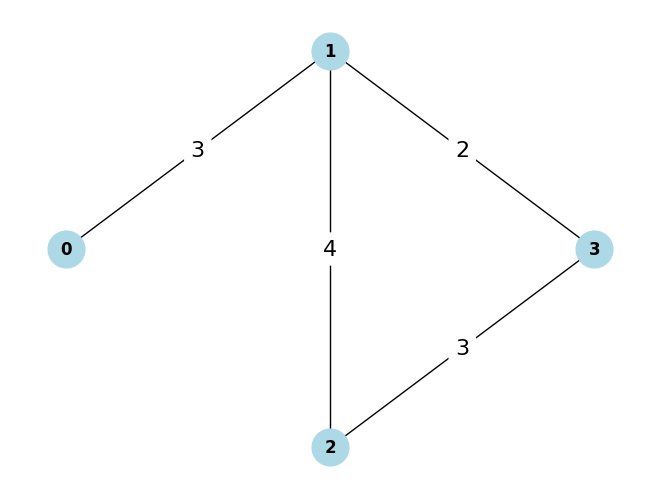

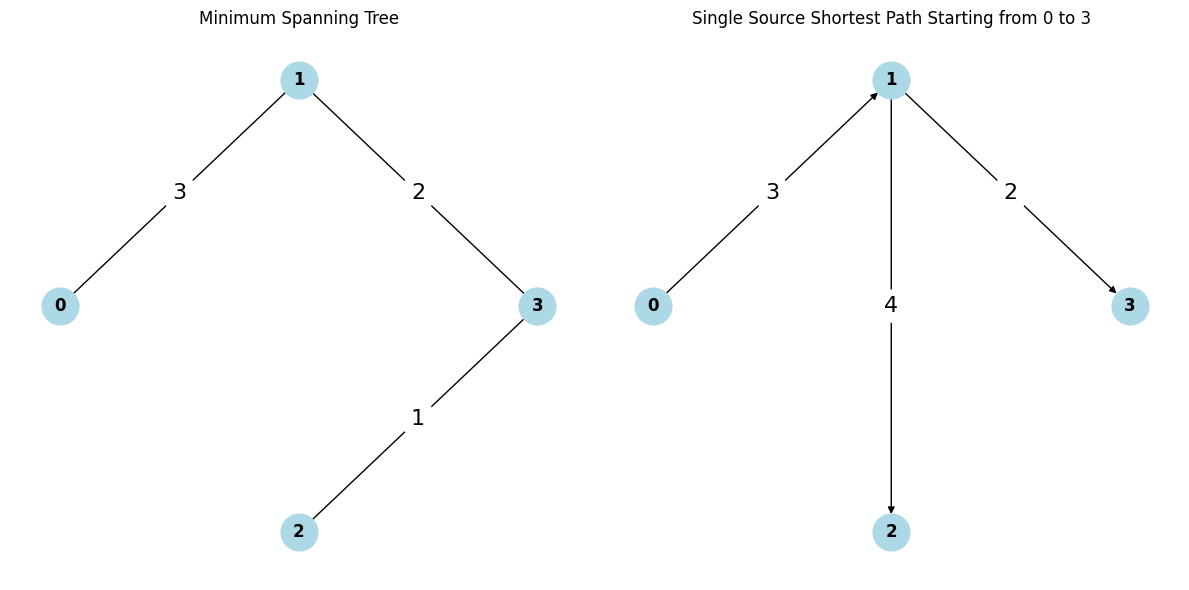

In [109]:
Tree = nx.Graph()

Tree.add_node(0)
Tree.add_node(1)
Tree.add_node(2)
Tree.add_node(3)

Tree.add_edge(0, 1, label='3')
Tree.add_edge(1, 2, label='4')
Tree.add_edge(1, 3, label='2')
Tree.add_edge(2, 3, label='3')

pos = {
    0: (-1, 0),  # Node 5 at the top
    1: (0, 1), # Other nodes arranged around node 5
    2: (0, -1),
    3: (1, 0)
}

nx.draw(Tree, pos=pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
edge_labels = nx.get_edge_attributes(Tree, 'label')
nx.draw_networkx_edge_labels(Tree, pos, edge_labels=edge_labels, font_size=16, rotate=False, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"))

plt.show()

MinimumSpanningTree = nx.Graph()

MinimumSpanningTree.add_node(0)
MinimumSpanningTree.add_node(1)
MinimumSpanningTree.add_node(2)
MinimumSpanningTree.add_node(3)

MinimumSpanningTree.add_edge(0, 1, label='3')
MinimumSpanningTree.add_edge(1, 3, label='2')
MinimumSpanningTree.add_edge(3, 2, label='1')

SingleSourceShortestPath = nx.DiGraph()

SingleSourceShortestPath.add_node(0)
SingleSourceShortestPath.add_node(1)
SingleSourceShortestPath.add_node(2)
SingleSourceShortestPath.add_node(3)

SingleSourceShortestPath.add_edge(0, 1, label='3')
SingleSourceShortestPath.add_edge(1, 3, label='2')
SingleSourceShortestPath.add_edge(1, 2, label='4')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


nx.draw(MinimumSpanningTree, pos, ax=ax1, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax1.set_title("Minimum Spanning Tree")
edge_labels = nx.get_edge_attributes(MinimumSpanningTree, 'label')
nx.draw_networkx_edge_labels(MinimumSpanningTree, pos, edge_labels=edge_labels, ax=ax1, font_size=16, rotate=False, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"))

nx.draw(SingleSourceShortestPath, pos, ax=ax2, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax2.set_title("Single Source Shortest Path Starting from 0 to 3")
edge_labels = nx.get_edge_attributes(SingleSourceShortestPath, 'label')
nx.draw_networkx_edge_labels(SingleSourceShortestPath, pos, edge_labels=edge_labels, ax=ax2, font_size=16, rotate=False, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"))

plt.tight_layout()
plt.show()

I'd like to thank the following resources which were referenced in this article:
- Yumin Lee's [Medium article](https://yuminlee2.medium.com/dijkstras-algorithm-6ad1e4bf9876)
- Base Case's [YouTube tutorial](https://youtu.be/sN1EBcBPCrU?feature=shared)